# Question & Answering Dataset Preprocess

This notebook takes question files and doccano's output file "answers.json1" and combines them into one json file. Output file tree structure.

#### Necessary Libraries

In [1]:
import json
import os
import re

## Load questions and answers

### Load questions

Under questions directory file structure must look like this:

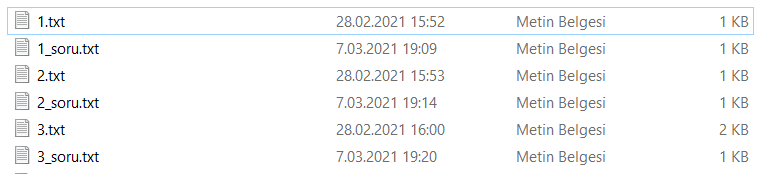

In [2]:
# saves dictionary as json file
def save_as_json(file_name, data):
    with open(file_name, "w") as formatted:
        json.dump(data, formatted)
        
# convert question texts to dictionaries
def question_texts_to_dict(questions, paragraph, id_):
    splitted = questions.split("\n")
    empty = True
    splitted_questions = []
    for i in range(int(len(splitted) / 2)):
        question = splitted[i*2]
        data = question.split(": ")  # Careful here. Did you have space after question names?
        # data = question.split(":")
        
        if data[1] != '':
            splitted_questions.append(data[1])
            empty = False
            
    question_dict = {}
    question_dict["questions"] = splitted_questions
    question_dict["text"] = paragraph
    question_dict["id"] = id_
    return question_dict

# read files under questions directory
def read_questions_dir(path, file_count):
    questions_dict = []
    id_ = 1
    for i in range(1, file_count + 1):
        try:
            f1 = open(path + str(i) + ".txt", "r", encoding="utf-8")
            f2 = open(path + str(i) + "_soru.txt", "r", encoding="utf-8")
        except:
            print("Dosya " + str(i) + ".txt açılamıyor")
            continue
        paragraph = f1.read()
        questions = f2.read()
        paragraph = paragraph.replace("\n", '')
        if paragraph[0] == ' ':
            paragraph = paragraph[1:]
        dictionary = question_texts_to_dict(questions, paragraph, id_)
        questions_dict.append(dictionary)
        id_ += 1
        f1.close()
        f2.close()

    return questions_dict 

In [3]:
path = "dataset/"
questions = read_questions_dir(path, 125)
save_as_json("questionsV1.json", questions)

print("Paragraf sayısı:", len(questions))

Dosya 32.txt açılamıyor
Dosya 33.txt açılamıyor
Dosya 115.txt açılamıyor
Paragraf sayısı: 122


In [4]:
questions[0]

{'questions': ["Türkiye'nin topraklarının büyük bölümü nerededir?",
  "Türkiye'nin kuzeybatısındaki komşusu kimdir?",
  "Türkiye'nin batıdaki komşusu kimdir?",
  "Türkiye'nin kuzeydoğudaki komşusu kimdir?",
  "Türkiye'nin doğudaki komşuları kimlerdir?",
  "Türkiye'nin güneydoğudaki komşuları kimlerdir?",
  "Türkiye'nin güneyinde hangi deniz bulunur?",
  "Türkiye'nin batısında hangi deniz bulunur?",
  "Türkiye'nin kuzeyinde hangi deniz bulunur?",
  'Marmara Denizi hangi kıtaları birbirinden ayırır?'],
 'text': "Türkiye Cumhuriyeti ya da kısaca Türkiye, topraklarının büyük bölümü Anadolu'da, küçük bir bölümü ise Balkan Yarımadası'nın güneydoğu uzantısı olan Trakya'da yer alan ülke. Kuzeybatıda Bulgaristan, batıda Yunanistan, kuzeydoğuda Gürcistan, doğuda Ermenistan, İran ve Azerbaycan'ın ekslav toprağı Nahçıvan, güneydoğuda ise Irak ve Suriye komşusudur. Güneyini Kıbrıs adası ve Akdeniz. Batısını Ege Denizi ve kuzeyini Karadeniz çevreler. Marmara Denizi ise İstanbul Boğazı ve Çanakkale B

### Load answers

Load doccano's output json1 file as answers dictionary.

In [5]:
# reads formatted answers file
def read_json(file_name):
    with open(file_name, "r", encoding="utf-8") as json_file:
        data = json.load(json_file)
    return data

# clears unnecessary whitespaces before and after answers
def clear_the_answers(answers):
    for j in range(len(answers["data"])):
        answer = answers["data"][j]
        for i in range(len(answer["labels"])):
            full_answer = answer["text"][answer["labels"][i][0]:answer["labels"][i][1]]
            if full_answer[0] == ' ':
                answer["labels"][i][0] += 1
            if full_answer[:-1] == ' ':
                answer["labels"][i][1] -= 1

# reads raw doccano output file and save as json.
def read_doccano_file(file_path):
    with open(file_path, "r", encoding="utf-8") as json_file:
        answers = json_file.read()
        
    text_answers =  answers.split("\n")
    answer_dict = []
    for answer in text_answers[:-1]:
        dictionary = json.loads(answer)
        answer_dict.append(dictionary)
        
    data = {"data": answer_dict}
    clear_the_answers(data)
    new_filename = file_path.split(".")[0] + "_formatted.json"
    
    save_as_json(new_filename, data)
    return data 

If you have a raw doccano output file choose 1st step and turn your doccano json1 file to json.

#### 1. For raw doccano output file

In [6]:
file_path = "datasetV1.json1"

answers = read_doccano_file(file_path)

#### 2. For formatted json file

In [7]:
file_path = "datasetV1_formatted.json"

answers = read_json(file_path)

In [8]:
print(answers["data"][0])

{'id': 1, 'text': "Türkiye Cumhuriyeti ya da kısaca Türkiye, topraklarının büyük bölümü Anadolu'da, küçük bir bölümü ise Balkan Yarımadası'nın güneydoğu uzantısı olan Trakya'da yer alan ülke. Kuzeybatıda Bulgaristan, batıda Yunanistan, kuzeydoğuda Gürcistan, doğuda Ermenistan, İran ve Azerbaycan'ın ekslav toprağı Nahçıvan, güneydoğuda ise Irak ve Suriye komşusudur. Güneyini Kıbrıs adası ve Akdeniz. Batısını Ege Denizi ve kuzeyini Karadeniz çevreler. Marmara Denizi ise İstanbul Boğazı ve Çanakkale Boğazı ile birlikte Anadolu'yu Trakya'dan yani Asya'yı Avrupa'dan ayırır. Türkiye, Avrupa ve Asya'nın kavşak noktasında yer alması sayesinde önemli bir jeostratejik güce sahiptir.", 'meta': {}, 'annotation_approver': None, 'labels': [[69, 76, 'cevap1'], [185, 196, 'cevap2'], [205, 215, 'cevap3'], [229, 238, 'cevap4'], [247, 304, 'cevap5'], [322, 336, 'cevap6'], [374, 381, 'cevap7'], [392, 403, 'cevap8'], [415, 424, 'cevap9'], [530, 548, 'cevap10']]}


## Merge Questions and Answers

Merge questions and answers dictionaries to one dictionary and save as json. 

In [9]:
# Counts matched questions and answers based on texts.
def matched_questions_and_answers(questions, answers):
    eslesti = 0
    for j in range(len(questions)):
        found = False
        i = 0
        while(i < len(answers["data"]) and not found):
            if answers["data"][i]['text'] == questions[j]["text"]:
                eslesti += 1
                found = True
            i += 1
        if not found:
            print("Questions " + str(j) + " eşleşemedi")

    print("Matched files: ", eslesti)

# creates q&a dictionary.
def create_q_a_dictionary(answer_index, question_index, questions, answers):
    qas_list = []
    for i in range(len(questions[question_index]["questions"])):
        start = answers["data"][answer_index]['labels'][i][0] 
        end = answers["data"][answer_index]['labels'][i][1]

        q_dict = {
            "question": questions[question_index]["questions"][i],
            "answer": answers["data"][answer_index]['text'][start:end],
            "answer_start": start,
            "answer_end": end
        }

        qas_list.append(q_dict)

    if qas_list:
        dictionary = {
            "text": answers["data"][answer_index]['text'],
            "qas": qas_list
        }
        return dictionary
    else:
        return None

# merges q&a dictionaries.    
def merge_questions_and_answers(questions, answers):
    dataset = []
    for j in range(len(questions)):
        found = False
        i = 0
        while(i < len(answers["data"]) and not found):
            if answers["data"][i]['text'] == questions[j]["text"]:
                found = True
            else:
                i += 1
        if found:
            answer_index = i   
            dictionary = create_q_a_dictionary(answer_index, j, questions, answers)
            if dictionary != None:
                dataset.append(dictionary)  
                
    final_dataset = {"data": dataset}
    return final_dataset

Solve problems for unmatched files!

In [10]:
print("Questions length: {}, Answers length: {}".format(len(questions), len(answers["data"])))
matched_questions_and_answers(questions, answers)

Questions length: 122, Answers length: 123
Matched files:  122


In [11]:
dataset = merge_questions_and_answers(questions, answers)
print(len(dataset["data"]))

114


In [12]:
save_as_json("wiki_dataV1.json", dataset)

In [18]:
dataset["data"][2]

{'text': "Komünizm (Latince kökenli communis - ortak, evrensel); üretim araçlarının ortak mülkiyeti üzerine kurulu sınıfsız, parasız ve devletsiz bir toplumsal düzen ve bu düzenin kurulmasını amaçlayan toplumsal, siyasi ve ekonomik bir ideoloji ve harekettir. Sadece üretim araçlarının ortaklaşalığına dayanan sosyalizmden ayırt edilmesi gerekir. 20. yüzyılın başından beri dünya siyasetindeki büyük güçlerden biri olarak modern komünizm, genellikle Karl Marx'ın ve Friedrich Engels’in kaleme aldığı Komünist Parti Manifestosu ile birlikte anılır. Buna göre özel mülkiyete dayalı kapitalist toplumun yerine meta üretiminin son bulduğu komünist toplum gerçektir. Komünizmin temelinde yatan sebep, sınıfsız, ortak mülkiyete dayalı bir toplumun kurulması isteğidir. Sınıfsız toplumlarda en genel anlamıyla tüm bireylerin eşit olması fikri karşıt görüşlüler tarafından ütopya olarak görülür ve zorla yaşanmaya çalışılırsa kaosa yol açacağı iddia edilir. Paris Komünü, komünist sistem yaşayabilmiş ilk top

## Load Q&A Dataset

In [14]:
dataset = read_json("wiki_dataV1.json")

In [15]:
print(dataset)

{'data': [{'text': "Türkiye Cumhuriyeti ya da kısaca Türkiye, topraklarının büyük bölümü Anadolu'da, küçük bir bölümü ise Balkan Yarımadası'nın güneydoğu uzantısı olan Trakya'da yer alan ülke. Kuzeybatıda Bulgaristan, batıda Yunanistan, kuzeydoğuda Gürcistan, doğuda Ermenistan, İran ve Azerbaycan'ın ekslav toprağı Nahçıvan, güneydoğuda ise Irak ve Suriye komşusudur. Güneyini Kıbrıs adası ve Akdeniz. Batısını Ege Denizi ve kuzeyini Karadeniz çevreler. Marmara Denizi ise İstanbul Boğazı ve Çanakkale Boğazı ile birlikte Anadolu'yu Trakya'dan yani Asya'yı Avrupa'dan ayırır. Türkiye, Avrupa ve Asya'nın kavşak noktasında yer alması sayesinde önemli bir jeostratejik güce sahiptir.", 'qas': [{'question': "Türkiye'nin topraklarının büyük bölümü nerededir?", 'answer': 'Anadolu', 'answer_start': 69, 'answer_end': 76}, {'question': "Türkiye'nin kuzeybatısındaki komşusu kimdir?", 'answer': 'Bulgaristan', 'answer_start': 185, 'answer_end': 196}, {'question': "Türkiye'nin batıdaki komşusu kimdir?", '